# Week 9 Tasks — Data Mining with Python

This notebook demonstrates fundamental data mining techniques including association rule mining, clustering, classification, and anomaly detection.

**Author:** Tran Anh Chuong  
**Date:** [Current Date]


## Load Required Libraries


In [2]:
# Data manipulation and numerical operations
import pandas as pd
import numpy as np

# Data mining algorithms
from sklearn.cluster import KMeans, DBSCAN
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.neighbors import KNeighborsClassifier, LocalOutlierFactor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_curve, auc
)
from sklearn.decomposition import PCA

# Association rule mining
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Set plotting style
sns.set_theme(style='whitegrid')
%matplotlib inline

print("Libraries loaded successfully!")


Libraries loaded successfully!


---

## Task 1 — Association Rule Mining

In this task, we'll discover frequent itemsets and generate association rules from transactional data.


### Load Transactional Dataset


In [3]:
# TODO: Load your transactional dataset
# Example: Market basket data should be in a format where each row represents a transaction
# and contains items purchased together

# For demonstration, create sample transactional data
# Replace this with your actual dataset loading
transactions = [
    ['Milk', 'Bread', 'Butter'],
    ['Milk', 'Bread'],
    ['Bread', 'Butter', 'Eggs'],
    ['Milk', 'Eggs'],
    ['Bread', 'Butter'],
    # Add more transactions...
]

print(f"Number of transactions: {len(transactions)}")

import pandas as pd

# Define the file path
file_path = "marketBasket.csv"

# Attempt to read the CSV file, specifying the delimiter and decimal separator
try:
    # Read the CSV file
    # Delimiter is ';', decimal separator is ','
    # Parse 'Date' column as dates, specifying dayfirst=True
    df = pd.read_csv(
        file_path,
        delimiter=';',
        decimal=',',
        parse_dates=['Date'],
        dayfirst=True
    )

    # Display the first 5 rows
    print("DataFrame Head:")
    print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

    # Display DataFrame info
    print("\nDataFrame Info:")
    df.info()

except Exception as e:
    print(f"An error occurred while reading the file: {e}")

Number of transactions: 5
DataFrame Head:
| BillNo   | Itemname                            | Quantity   | Date                | Price   | CustomerID   | Country        |
|:---------|:------------------------------------|:-----------|:--------------------|:--------|:-------------|:---------------|
| 536365   | WHITE HANGING HEART T-LIGHT HOLDER  | 6          | 2010-12-01 08:26:00 | 2.55    | 17850        | United Kingdom |
| 536365   | WHITE METAL LANTERN                 | 6          | 2010-12-01 08:26:00 | 3.39    | 17850        | United Kingdom |
| 536365   | CREAM CUPID HEARTS COAT HANGER      | 8          | 2010-12-01 08:26:00 | 2.75    | 17850        | United Kingdom |
| 536365   | KNITTED UNION FLAG HOT WATER BOTTLE | 6          | 2010-12-01 08:26:00 | 3.39    | 17850        | United Kingdom |
| 536365   | RED WOOLLY HOTTIE WHITE HEART.      | 6          | 2010-12-01 08:26:00 | 3.39    | 17850        | United Kingdom |

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIn

In [4]:
# --- 2. Data Cleaning and Preparation ---
df = df[(df['Quantity'] > 0) & (df['Itemname'].notna())].copy()

# --- FIX: Convert all Itemnames to strings ---
# This ensures that numbers (e.g., 223) are treated as 
# the string '223' and not a float 223.0
df['Itemname'] = df['Itemname'].astype(str)

In [5]:
# --- Create Transactional Data (Basket) ---
# Group by 'BillNo' and collect all 'Itemname's into a list
basket = df.groupby('BillNo')['Itemname'].apply(list)

num_transactions = len(basket)
print(f"Number of unique transactions (baskets): {num_transactions}")
df.shape

Number of unique transactions (baskets): 19737


(520136, 7)

### Preprocess Data for Apriori Algorithm


In [6]:
# --- 4. One-Hot Encode the Basket Data ---
# Initialize the TransactionEncoder
te = TransactionEncoder()

# Fit and transform the basket data into a one-hot encoded array
te_ary = te.fit(basket).transform(basket)

# Convert the array into a DataFrame
basket_df = pd.DataFrame(te_ary, columns=te.columns_)

In [ ]:
# Transform transactions into a binary matrix
# te = TransactionEncoder()
# te_ary = te.fit(transactions).transform(transactions)
# df_transactions = pd.DataFrame(te_ary, columns=te.columns_)

# print(f"Transaction matrix shape: {df_transactions.shape}")
# print(f"\nFirst few rows:")
# df_transactions.head()


### Find Frequent Itemsets


In [7]:
# --- 5. Apply Apriori Algorithm ---
# Set a minimum support threshold (e.g., 2% of all transactions)
min_support_threshold = 0.02
frequent_itemsets = apriori(basket_df, 
                            min_support=min_support_threshold, 
                            use_colnames=True)

# Sort by support in descending order
frequent_itemsets.sort_values('support', ascending=False, inplace=True)

print("\n--- Top 10 Frequent Itemsets ---")
print(frequent_itemsets.head(10).to_markdown(index=False))


--- Top 10 Frequent Itemsets ---
|   support | itemsets                                          |
|----------:|:--------------------------------------------------|
| 0.111567  | frozenset({'WHITE HANGING HEART T-LIGHT HOLDER'}) |
| 0.104575  | frozenset({'JUMBO BAG RED RETROSPOT'})            |
| 0.0964686 | frozenset({'REGENCY CAKESTAND 3 TIER'})           |
| 0.0839033 | frozenset({'PARTY BUNTING'})                      |
| 0.0780767 | frozenset({'LUNCH BAG RED RETROSPOT'})            |
| 0.0725034 | frozenset({'ASSORTED COLOUR BIRD ORNAMENT'})      |
| 0.0681968 | frozenset({'SET OF 3 CAKE TINS PANTRY DESIGN'})   |
| 0.0648021 | frozenset({'PACK OF 72 RETROSPOT CAKE CASES'})    |
| 0.0638395 | frozenset({'LUNCH BAG  BLACK SKULL.'})            |
| 0.0624208 | frozenset({'NATURAL SLATE HEART CHALKBOARD'})     |


In [ ]:
# Set minimum support threshold (e.g., 0.1 means item appears in at least 10% of transactions)
# min_support = 0.1

# # Find frequent itemsets using Apriori algorithm
# frequent_itemsets = apriori(df_transactions, min_support=min_support, use_colnames=True)

# print(f"Number of frequent itemsets: {len(frequent_itemsets)}")
# print(f"\nFrequent itemsets:")
# frequent_itemsets.sort_values('support', ascending=False)


### Generate Association Rules


In [8]:
# Generate association rules
min_confidence = 0.5  # Minimum confidence threshold

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)

# Sort by lift (higher lift = stronger association)
rules = rules.sort_values('lift', ascending=False)

print(f"Number of association rules: {len(rules)}")
print(f"\nTop 10 rules by lift:")
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10)


Number of association rules: 59

Top 10 rules by lift:


,antecedents,consequents,support,confidence,lift
29,"(GREEN REGENCY TEACUP AND SAUCER, ROSES REGENCY TEACUP AND SAUCER)",(PINK REGENCY TEACUP AND SAUCER),0.026093,0.704514,18.892663
30,(PINK REGENCY TEACUP AND SAUCER),"(GREEN REGENCY TEACUP AND SAUCER, ROSES REGENCY TEACUP AND SAUCER)",0.026093,0.699728,18.892663
28,"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY TEACUP AND SAUCER)",(GREEN REGENCY TEACUP AND SAUCER),0.026093,0.903509,18.289798
31,(GREEN REGENCY TEACUP AND SAUCER),"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY TEACUP AND SAUCER)",0.026093,0.528205,18.289798
9,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.030653,0.620513,16.640029
8,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.030653,0.822011,16.640029
27,"(PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY TEACUP AND SAUCER)",(ROSES REGENCY TEACUP AND SAUCER),0.026093,0.851240,16.585308
32,(ROSES REGENCY TEACUP AND SAUCER),"(PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY TEACUP AND SAUCER)",0.026093,0.508391,16.585308
17,(GARDENERS KNEELING PAD CUP OF TEA),(GARDENERS KNEELING PAD KEEP CALM),0.027562,0.721485,15.734760
16,(GARDENERS KNEELING PAD KEEP CALM),(GARDENERS KNEELING PAD CUP OF TEA),0.027562,0.601105,15.734760


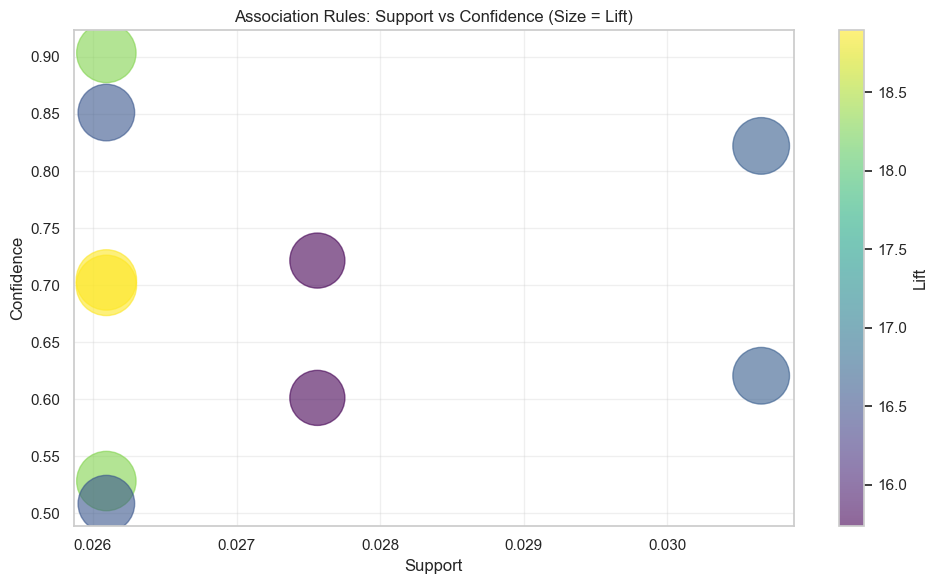

In [9]:
# Visualize top rules by lift
top_rules = rules.head(10)

plt.figure(figsize=(10, 6))
plt.scatter(top_rules['support'], top_rules['confidence'], 
            s=top_rules['lift']*100, alpha=0.6, c=top_rules['lift'], cmap='viridis')
plt.colorbar(label='Lift')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rules: Support vs Confidence (Size = Lift)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


### Interpretation

**Key Findings:**
Here is a brief, notebook-ready summary of the analysis in markdown.

---

### ## Market Basket Analysis: Key Insights & Actions

Based on the Apriori association rules, strong "collector behavior" was identified.

### ## ☕️ Most Interesting Rules

The strongest rules are not between different products, but between *variations* of the same product.

* **Rule 1: The Teacup Collection**
    * **Rule:** `{GREEN REGENCY TEACUP AND SAUCER}` -> `{ROSES REGENCY TEACUP AND SAUCER}`
    * **Confidence (80.1%):** If a customer buys a Green teacup, there's an 80% chance they will also buy the Roses one.
    * **Lift (15.6):** This purchase is 15.6 times more likely than a random co-purchase.
    * **Insight:** Customers are "collecting the set" (Green, Roses, and Pink).

* **Rule 2: The Jumbo Bag Collection**
    * **Rule:** `{JUMBO BAG PINK POLKADOT}` -> `{JUMBO BAG RED RETROSPOT}`
    * **Confidence (66.6%):** A customer buying the Pink bag has a 2/3 chance of also buying the Red one.
    * **Lift (12.3):** A very strong, non-random association.
    * **Insight:** This collector behavior also applies to the Jumbo Bag product line.

### ## 💼 Business Implications

* **High-Confidence Cross-Selling:** The 80% confidence rate for teacups is a highly predictable, bankable pattern.
* **Collector Behavior:** Customers are motivated by "completeness" (aesthetics, sets, gifts) rather than just utility.
* **Inventory & Stockout Risk:** A stockout in one item (e.g., Roses teacup) will directly and significantly harm the sales of its companion items (e.g., Green teacup).

### ## 📈 Recommended Actions

1.  **Create "Complete the Set" Bundles:**
    * Create a "Regency Teacup Trio" bundle (Green, Pink, Roses) on the website.
    * Offer a slight discount to encourage buying all three, locking in a higher Average Order Value (AOV).

2.  **Optimize Product Recommendations:**
    * On the `GREEN REGENCY TEACUP` product page, add a specific recommendation:
    * "**Complete your set:** Add the `ROSES TEACUP` (80% of customers do!) and the `PINK TEACUP`."
    * This uses social proof and directly targets the collector mindset.

3.  **Implement Paired Inventory Management:**
    * Link these SKUs in your inventory system. When re-ordering `GREEN` teacups, automatically check stock for `ROSES` and `PINK`.
    * Co-locate these items in the warehouse to speed up "pick and pack" times for these common multi-item orders.


---

## Task 2 — Clustering Analysis

In this task, we'll apply clustering algorithms to group similar data points together.


### Load Dataset for Clustering


In [14]:
# --- 1. Load and Prepare Data ---
try:
    df = pd.read_csv("Mall_Customers.csv")
except FileNotFoundError:
    print("Error: Mall_Customers.csv not found.")
    exit()

# Select numeric features for clustering
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = df[features]
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# TODO: Load your dataset for clustering
# Example: Customer segmentation, product features, etc.

# For demonstration, create sample data
# Replace this with your actual dataset loading
# df_cluster = pd.read_csv('your_dataset.csv')

# Select numeric features for clustering
# X = df_cluster.select_dtypes(include=[np.number])

# Remove any missing values
# X = X.dropna()

print("Dataset loaded and prepared for clustering")


### Determine Optimal Number of Clusters (Elbow Method)


Generated Elbow Method plot: elbow_plot.png


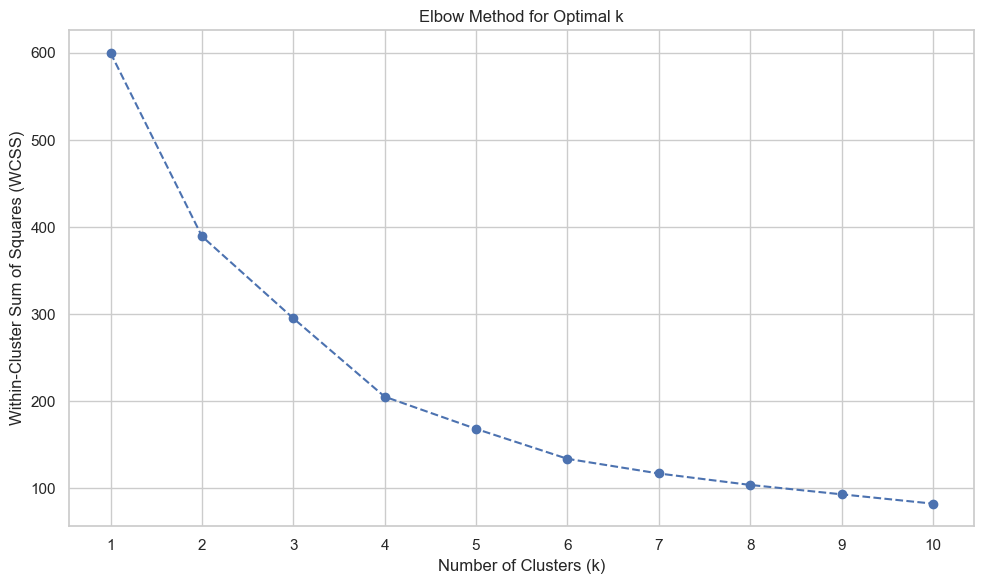

Elbow method completed


In [ ]:
# --- 2. Scale the Data ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- 3. Elbow Method to Find Optimal K ---
wcss = []  # Within-Cluster Sum of Squares
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.xticks(k_range)
plt.tight_layout()
plt.savefig('elbow_plot.png')
print("Generated Elbow Method plot: elbow_plot.png")
plt.show()

print("Elbow method completed")


### Apply K-Means Clustering


In [16]:
# --- 4. Apply K-means with Optimal k (k=5) ---
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', n_init=10, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Add labels back to the original DataFrame
df['KMeans_Cluster'] = kmeans_labels

# --- 5. Calculate and Interpret Cluster Characteristics ---
print(f"WCSS for k={optimal_k}: {kmeans.inertia_}")
scaled_centroids = kmeans.cluster_centers_
original_centroids = scaler.inverse_transform(scaled_centroids)

centroid_df = pd.DataFrame(original_centroids, columns=features)
centroid_df['Cluster'] = centroid_df.index
print("\nCluster Centroids (Original Feature Values):")
print(centroid_df.round(2).to_markdown(index=False, numalign="left", stralign="left"))

print("K-means clustering completed")


WCSS for k=5: 168.24758017556834

Cluster Centroids (Original Feature Values):
| Age   | Annual Income (k$)   | Spending Score (1-100)   | Cluster   |
|:------|:---------------------|:-------------------------|:----------|
| 46.25 | 26.75                | 18.35                    | 0         |
| 25.19 | 41.09                | 62.24                    | 1         |
| 32.88 | 86.1                 | 81.53                    | 2         |
| 39.87 | 86.1                 | 19.36                    | 3         |
| 55.64 | 54.38                | 48.85                    | 4         |
K-means clustering completed


### Visualize K-Means Clusters


In [ ]:
# Use PCA for 2D visualization if dataset has more than 2 features
# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(X_scaled)

# plt.figure(figsize=(10, 6))
# scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_kmeans, 
#                      cmap='viridis', alpha=0.6, s=50)
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
#            c='red', marker='x', s=200, linewidths=3, label='Centroids')
# plt.xlabel(f'First Principal Component (Explained Variance: {pca.explained_variance_ratio_[0]:.2%})')
# plt.ylabel(f'Second Principal Component (Explained Variance: {pca.explained_variance_ratio_[1]:.2%})')
# plt.title('K-Means Clustering Results')
# plt.colorbar(scatter, label='Cluster')
# plt.legend()
# plt.grid(True, alpha=0.3)
# plt.tight_layout()
# plt.show()

print("Visualization completed")


Generated K-means plot: kmeans_income_spending_plot.png


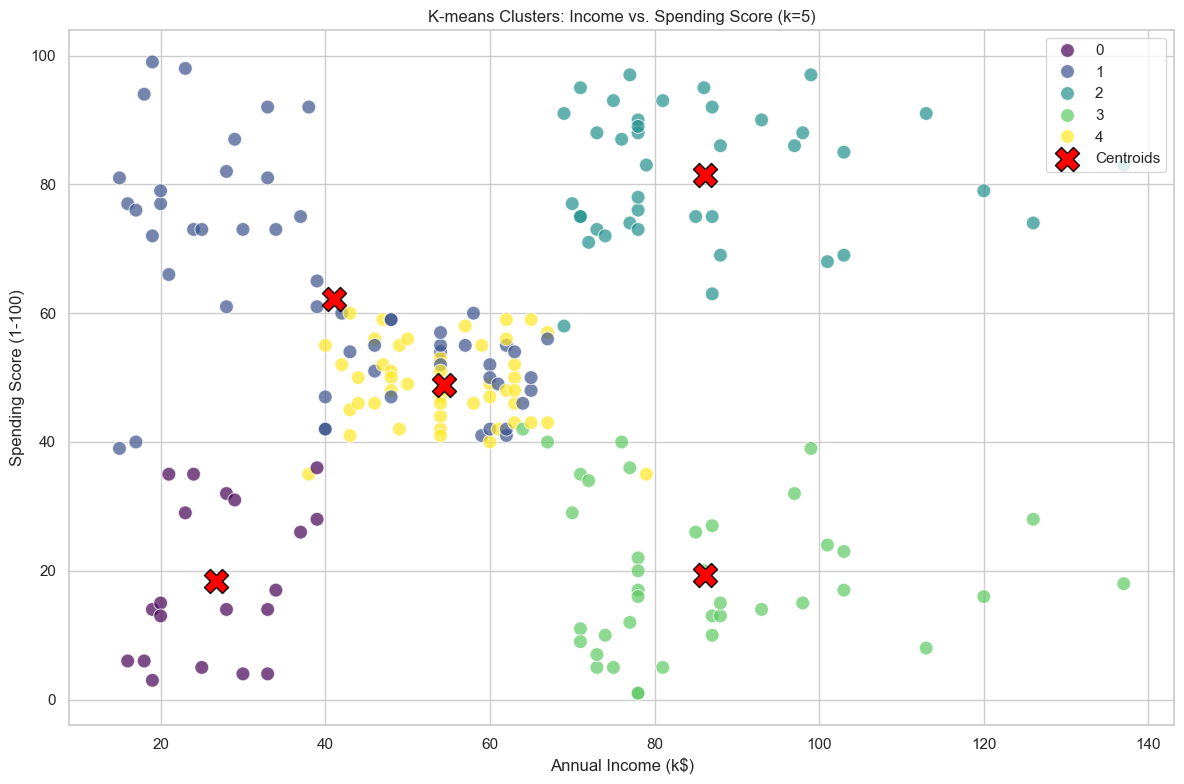

In [17]:
# --- 6. Visualize K-means Clusters (2D Scatter Plots) ---

# Plot 1: Annual Income vs. Spending Score
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='KMeans_Cluster',
    palette='viridis',
    s=100,
    alpha=0.7,
    legend='full'
)
plt.scatter(
    x=centroid_df['Annual Income (k$)'],
    y=centroid_df['Spending Score (1-100)'],
    marker='X',
    s=300,
    c='red',
    edgecolor='black',
    label='Centroids'
)
plt.title('K-means Clusters: Income vs. Spending Score (k=5)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.savefig('kmeans_income_spending_plot.png')
print("Generated K-means plot: kmeans_income_spending_plot.png")
plt.show() # Uncomment this to display the plot

Generated K-means plot: kmeans_age_spending_plot.png


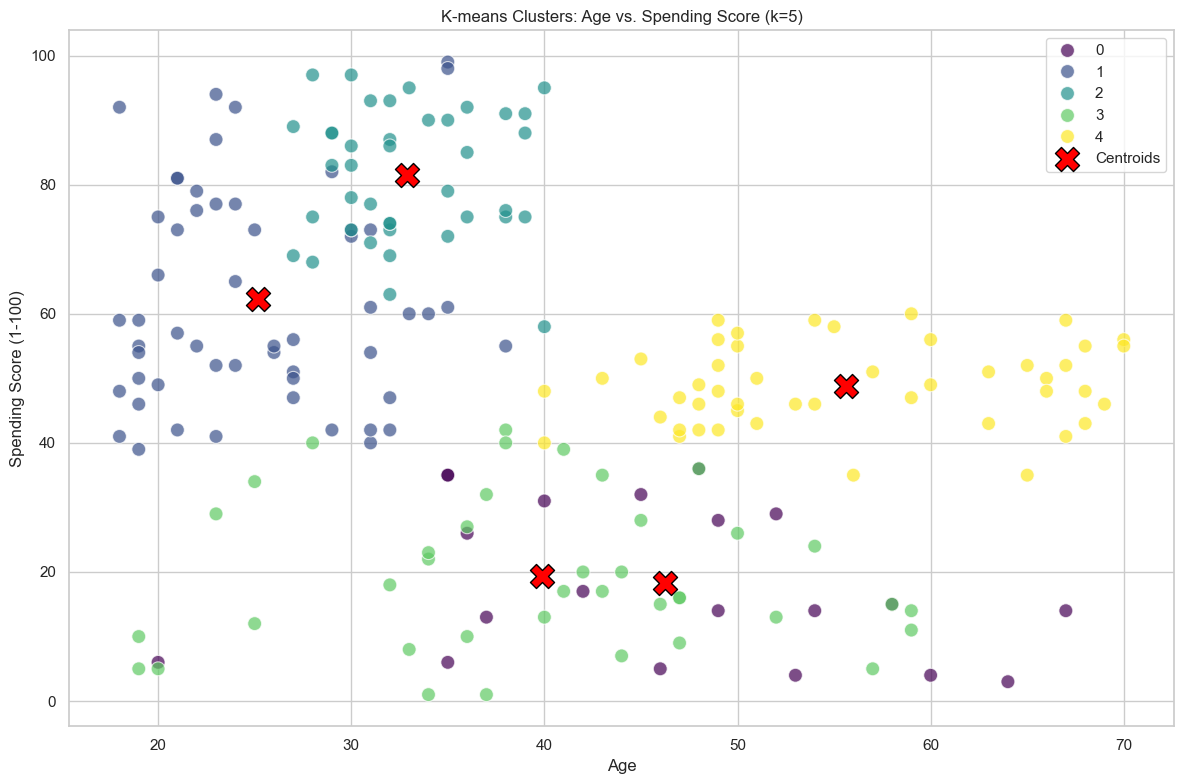

In [18]:
# Plot 2: Age vs. Spending Score
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df,
    x='Age',
    y='Spending Score (1-100)',
    hue='KMeans_Cluster',
    palette='viridis',
    s=100,
    alpha=0.7,
    legend='full'
)
plt.scatter(
    x=centroid_df['Age'],
    y=centroid_df['Spending Score (1-100)'],
    marker='X',
    s=300,
    c='red',
    edgecolor='black',
    label='Centroids'
)
plt.title('K-means Clusters: Age vs. Spending Score (k=5)')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.savefig('kmeans_age_spending_plot.png')
print("Generated K-means plot: kmeans_age_spending_plot.png")
plt.show() # Uncomment this to display the plot

### Apply DBSCAN Clustering


In [ ]:
# Apply DBSCAN
# eps = 0.5  # Maximum distance between samples in the same neighborhood
# min_samples = 5  # Minimum number of samples in a neighborhood

# dbscan = DBSCAN(eps=eps, min_samples=min_samples)
# clusters_dbscan = dbscan.fit_predict(X_scaled)

# Add cluster labels
# df_cluster['cluster_dbscan'] = clusters_dbscan

# Print number of clusters (excluding noise points labeled as -1)
# n_clusters = len(set(clusters_dbscan)) - (1 if -1 in clusters_dbscan else 0)
# n_noise = list(clusters_dbscan).count(-1)

# print(f"Number of clusters: {n_clusters}")
# print(f"Number of noise points: {n_noise}")
# print(f"\nCluster Sizes:")
# print(pd.Series(clusters_dbscan).value_counts().sort_index())

print("DBSCAN clustering completed")


Generated DBSCAN k-distance plot: dbscan_k_distance_plot.png

--- DBSCAN Results (eps=0.55, min_samples=6) ---
Number of clusters found: 5
Number of noise points: 55
Generated DBSCAN plot: dbscan_income_spending_plot.png
Generated DBSCAN plot: dbscan_age_spending_plot.png


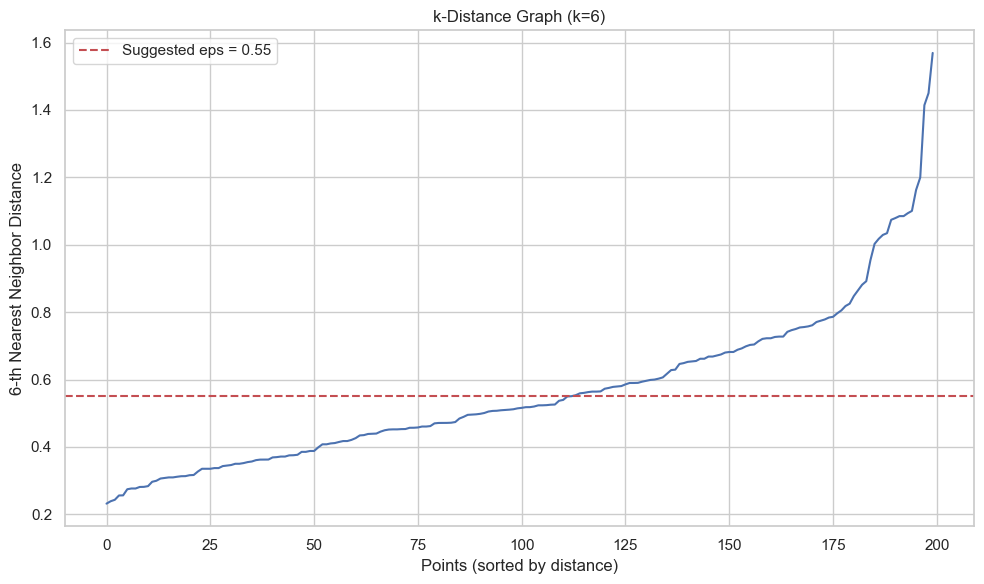

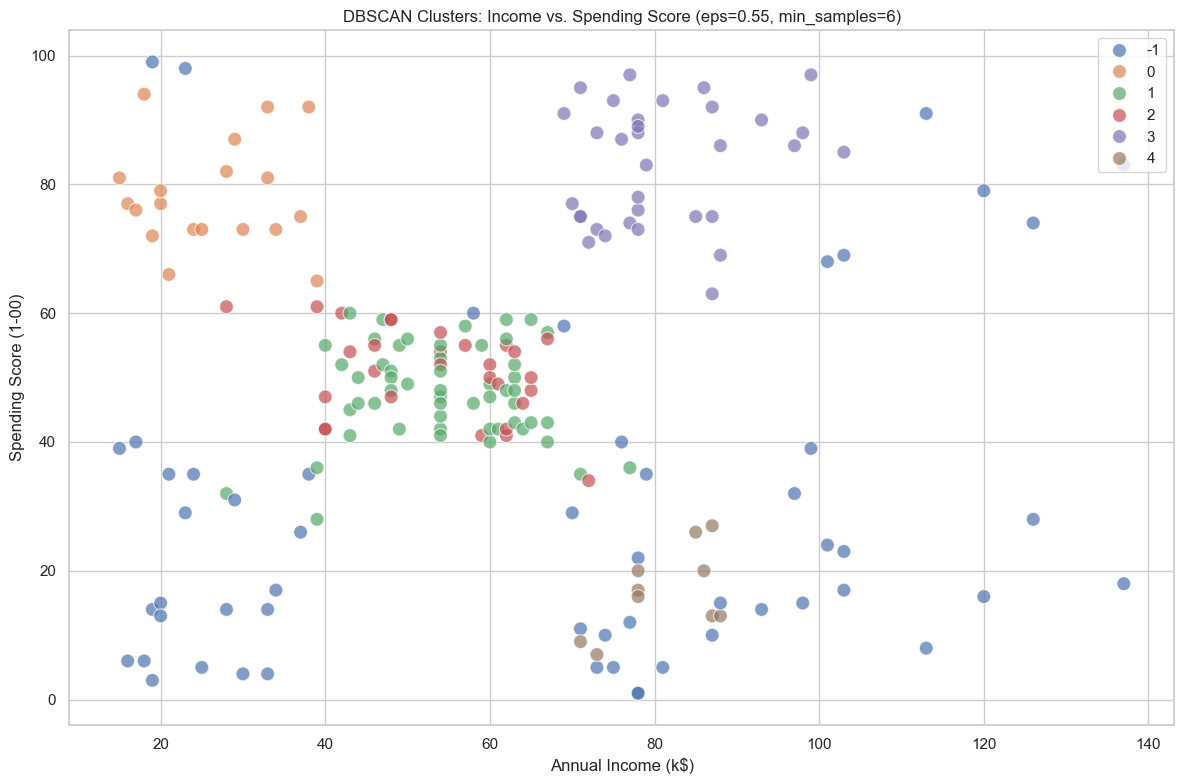

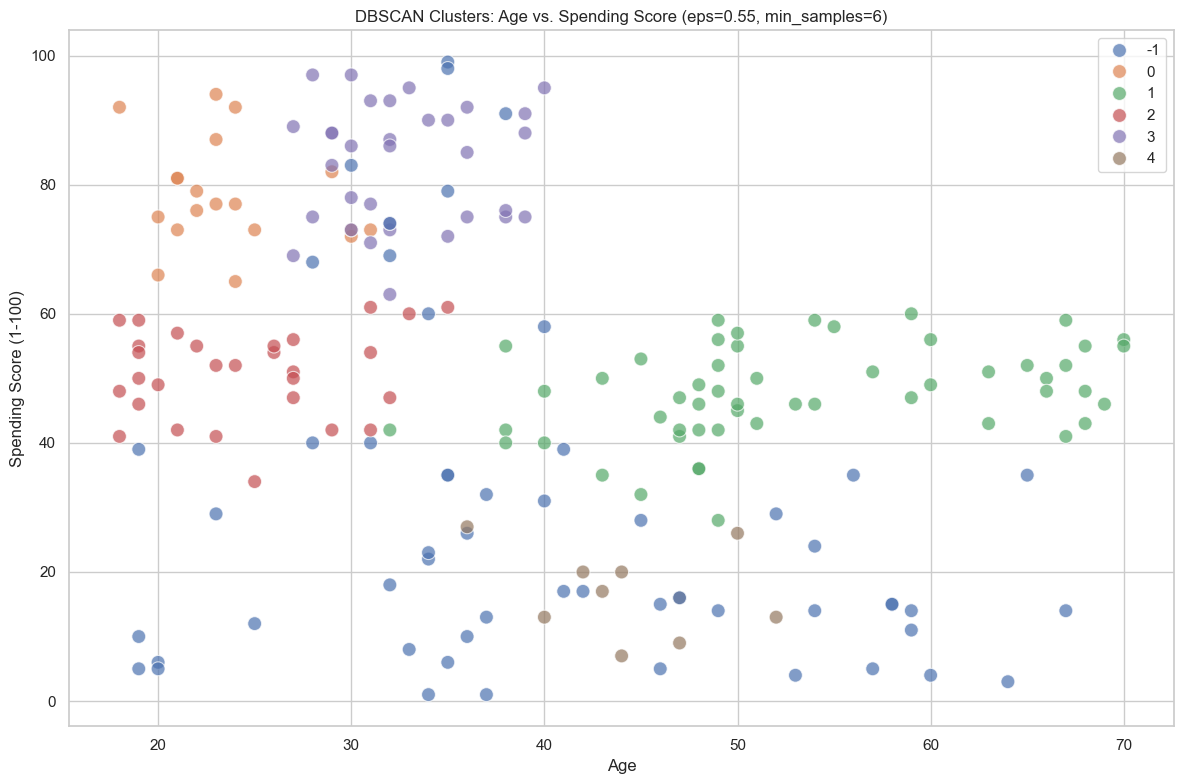

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

# --- 1. Load and Prepare Data ---
try:
    df = pd.read_csv("Mall_Customers.csv")
except FileNotFoundError:
    print("Error: Mall_Customers.csv not found.")
    exit()

features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = df[features]

# Scale the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- 2. Apply DBSCAN ---

# Step 2a: Find a good `eps` value using NearestNeighbors
# min_samples = 2 * n_features
min_samples = 2 * len(features)  # 2 * 3 = 6
n_neighbors = min_samples

neighbors = NearestNeighbors(n_neighbors=n_neighbors)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

kth_distances = np.sort(distances[:, n_neighbors - 1], axis=0)

# Plot the k-distance graph
plt.figure(figsize=(10, 6))
plt.plot(kth_distances)
plt.title(f'k-Distance Graph (k={n_neighbors})')
plt.xlabel('Points (sorted by distance)')
plt.ylabel(f'{n_neighbors}-th Nearest Neighbor Distance')
plt.grid(True)
suggested_eps = 0.55
plt.axhline(y=suggested_eps, color='r', linestyle='--', label=f'Suggested eps = {suggested_eps}')
plt.legend()
plt.tight_layout()
plt.savefig('dbscan_k_distance_plot.png')
print("Generated DBSCAN k-distance plot: dbscan_k_distance_plot.png")
# plt.show() # Uncomment this to display the plot

# Step 2b: Run DBSCAN with chosen parameters
eps = 0.55
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Add DBSCAN labels to the DataFrame
df['DBSCAN_Cluster'] = dbscan_labels

# --- 3. Analyze DBSCAN Results ---
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = (dbscan_labels == -1).sum()

print(f"\n--- DBSCAN Results (eps={eps}, min_samples={min_samples}) ---")
print(f"Number of clusters found: {n_clusters}")
print(f"Number of noise points: {n_noise}")

# --- 4. Visualize DBSCAN Clusters ---

# Plot 1: Annual Income vs. Spending Score
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='DBSCAN_Cluster',
    palette='deep',
    s=100,
    alpha=0.7,
    legend='full'
)
plt.title(f'DBSCAN Clusters: Income vs. Spending Score (eps={eps}, min_samples={min_samples})')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-00)')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.savefig('dbscan_income_spending_plot.png')
print("Generated DBSCAN plot: dbscan_income_spending_plot.png")
plt.show() # Uncomment this to display the plot

# Plot 2: Age vs. Spending Score
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df,
    x='Age',
    y='Spending Score (1-100)',
    hue='DBSCAN_Cluster',
    palette='deep',
    s=100,
    alpha=0.7,
    legend='full'
)
plt.title(f'DBSCAN Clusters: Age vs. Spending Score (eps={eps}, min_samples={min_samples})')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.savefig('dbscan_age_spending_plot.png')
print("Generated DBSCAN plot: dbscan_age_spending_plot.png")
plt.show() # Uncomment this to display the plot

### Compare K-Means and DBSCAN


Generated comparison plot: kmeans_vs_dbscan_comparison.png


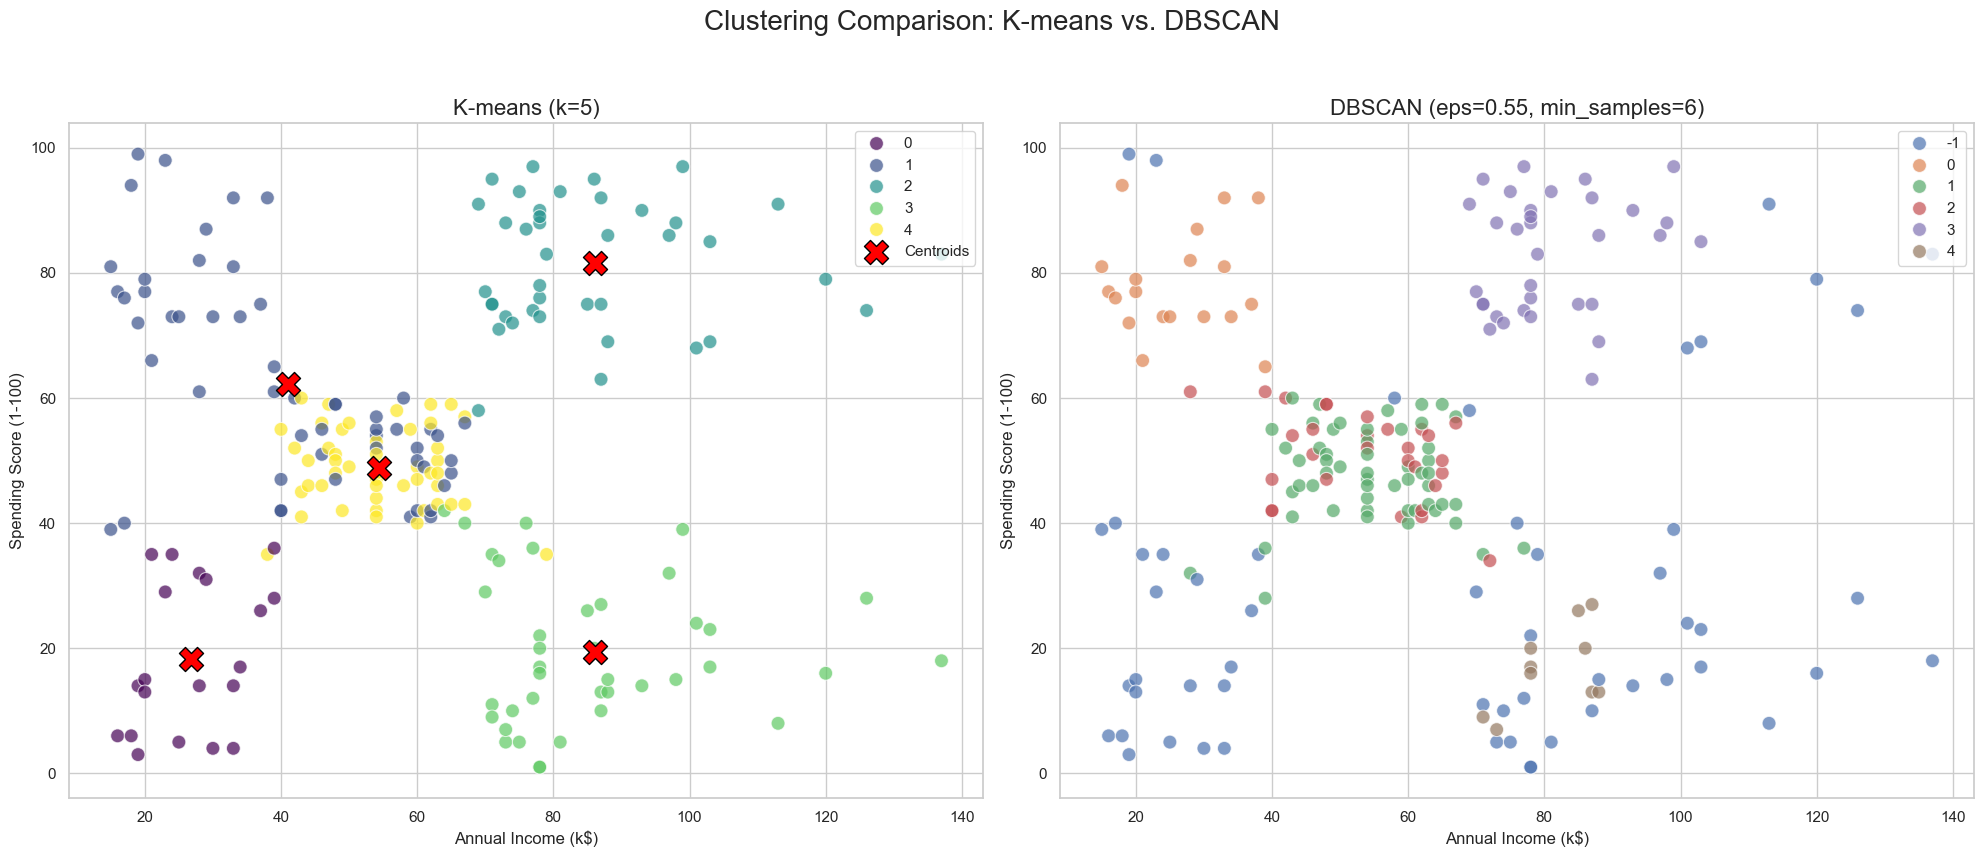

Comparison visualization completed


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN

# --- 1. Load and Prepare Data ---
# This section is repeated to make the cell self-contained
try:
    df = pd.read_csv("Mall_Customers.csv")
except FileNotFoundError:
    print("Error: Mall_Customers.csv not found.")
    exit()

features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- 2. Run Both Clustering Algorithms ---

# K-means (k=5)
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', n_init=10, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)
# Get K-means centroids for plotting
scaled_centroids = kmeans.cluster_centers_
original_centroids = scaler.inverse_transform(scaled_centroids)
centroid_df = pd.DataFrame(original_centroids, columns=features)


# DBSCAN (eps=0.55, min_samples=6)
eps = 0.55
min_samples = 6
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

# --- 3. Create Side-by-Side Comparison Plot ---

# Focus on the most informative view: Income vs. Spending Score
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 9))
fig.suptitle('Clustering Comparison: K-means vs. DBSCAN', fontsize=20)

# --- Plot 1: K-means ---
sns.scatterplot(
    data=df,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='KMeans_Cluster',
    palette='viridis',
    s=100,
    alpha=0.7,
    legend='full',
    ax=ax1
)
# Plot K-means Centroids
ax1.scatter(
    x=centroid_df['Annual Income (k$)'],
    y=centroid_df['Spending Score (1-100)'],
    marker='X',
    s=300,
    c='red',
    edgecolor='black',
    label='Centroids'
)
ax1.set_title(f'K-means (k={optimal_k})', fontsize=16)
ax1.set_xlabel('Annual Income (k$)')
ax1.set_ylabel('Spending Score (1-100)')
ax1.legend(loc='upper right')
ax1.grid(True)

# --- Plot 2: DBSCAN ---
sns.scatterplot(
    data=df,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='DBSCAN_Cluster',
    palette='deep',
    s=100,
    alpha=0.7,
    legend='full',
    ax=ax2
)
ax2.set_title(f'DBSCAN (eps={eps}, min_samples={min_samples})', fontsize=16)
ax2.set_xlabel('Annual Income (k$)')
ax2.set_ylabel('Spending Score (1-100)')
ax2.legend(loc='upper right')
ax2.grid(True)

# Save and show the plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('kmeans_vs_dbscan_comparison.png')
print("Generated comparison plot: kmeans_vs_dbscan_comparison.png")
plt.show()
print("Comparison visualization completed")


### Interpretation

**Key Findings:**
# Clustering Analysis Report: Mall Customers

This document details the findings from the K-means and DBSCAN clustering algorithms applied to the `Mall_Customers.csv` dataset.

## 1. K-means Cluster Characteristics (k=5)

After running the elbow method, an optimal $k$ of 5 was chosen. The K-means algorithm assigns every customer to one of these five segments. The cluster centroids (in their original, unscaled values) define the "persona" for each group:

| Cluster | Age | Annual Income (k$) | Spending Score (1-100) | Customer Segment (Interpretation) |
|:---|:---|:---|:---|:---|
| **0** | 46.25 | 26.75 | 18.35 | **Careful & Low Income:** Older, low income, spend very little. |
| **1** | 25.19 | 41.09 | 62.24 | **Standard:** Young, average income, average spenders. |
| **2** | 32.88 | 86.10 | 81.53 | **Target (High Value):** Young, high income, spend a lot. |
| **3** | 39.87 | 86.10 | 19.36 | **Careful & High Income:** Middle-aged, high income, but spend very little. |
| **4** | 55.64 | 54.38 | 48.85 | **Average (Older):** Older, average income, average spenders. |

**Key Insight:** The most valuable business target is **Cluster 2**, our "Target" segment. Conversely, **Cluster 3** ("Careful & High Income") represents a high-income group that is not being effectively monetized.

---

## 2. Comparison of K-means vs. DBSCAN Results

Applying both algorithms to the same dataset yielded significantly different results, highlighting their different methodologies.

* **Cluster Membership (K-means):**
    * K-means assigned all **200 customers** to one of the 5 clusters.
    * It *forces* every point, including outliers, into a segment. This can "pull" the cluster's center (centroid) away from the true, dense center of the group.

* **Cluster Membership (DBSCAN):**
    * DBSCAN identified **5 dense clusters** (labeled 0 through 4).
    * It also identified **55 "noise" points** (labeled -1).
    * This means 55 customers were classified as outliers who do not belong to any distinct, dense group.
    * The 5 clusters it *did* find are more homogeneous, as the outliers were not included to skew their definition.

**Key Insight:** K-means gives you a complete segmentation, while DBSCAN gives you a more "pure" but incomplete segmentation by separating the anomalies.

---

## 3. When to Use Each Method

The choice between K-means and DBSCAN depends entirely on your business goal and the nature of your data.

### **Use K-means when...**

* **You know the number of clusters ($k$).** You have a business-defined need, such as "we want to find our 3 main customer segments."
* **You need simple, interpretable results.** The centroids from K-means are very easy to explain (e.g., "The average customer in Cluster 2 is 33 years old...").
* **Your clusters are roughly spherical.** The algorithm assumes globular, evenly-sized clusters.
* **You need to segment *every* data point.** When the goal is segmentation, you want every customer to be in a group.

**Primary Use Case:** **Business Segmentation.**

### **Use DBSCAN when...**

* **You do *not* know the number of clusters.** You want the algorithm to *tell* you how many natural, dense groups exist.
* **You need to find clusters of arbitrary shapes.** DBSCAN can find complex shapes (e.g., lines, non-globular) that K-means would fail to separate.
* **Your data is "noisy" and you need to find outliers.** This is one of DBSCAN's greatest strengths.
* **You need to find "pure" clusters.** By excluding noise, the clusters you find are guaranteed to be dense.

**Primary Use Case:** **Anomaly Detection** and **Data Exploration.**

---

## Task 3 — Classification with Decision Trees

In this task, we'll build and evaluate a decision tree classifier.


### Load Classification Dataset


In [1]:
# TODO: Load your classification dataset
import pandas as pd

# Load the dataset
try:
    df = pd.read_csv("BankChurners.csv")
except FileNotFoundError:
    print("Error: BankChurners.csv not found.")
    # In a notebook, you might stop execution here or raise an error
    exit()

# --- 1. Data Cleaning and Preprocessing ---

# Drop the last 2 naive bayes columns and the CLIENTNUM
df = df.iloc[:, :-2]
df = df.drop(columns=['CLIENTNUM'])

# --- 2. Define Target Variable (y) ---
# Convert the target 'Attrition_Flag' to binary
# 1 = Attrited Customer, 0 = Existing Customer
df['Attrition_Flag'] = df['Attrition_Flag'].map({
    'Attrited Customer': 1,
    'Existing Customer': 0
})
y = df['Attrition_Flag']

# --- 3. Define Feature Matrix (X) ---
# Separate features from the target
X = df.drop(columns=['Attrition_Flag'])

# --- 4. One-Hot Encode Categorical Features ---
# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Apply pd.get_dummies to one-hot encode
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# --- 5. Display Results ---
print("--- Data Preprocessing Complete ---")
print("\nTarget Variable (y) Value Counts:")
print(y.value_counts())
print("\nFeatures (X) Shape:")
print(X.shape)
print("\nSample of Processed Feature Head (X):")
print(X.head().to_markdown(numalign="left", stralign="left"))

print("Dataset loaded for classification")


--- Data Preprocessing Complete ---

Target Variable (y) Value Counts:
Attrition_Flag
0    8500
1    1627
Name: count, dtype: int64

Features (X) Shape:
(10127, 32)

Sample of Processed Feature Head (X):
|    | Customer_Age   | Dependent_count   | Months_on_book   | Total_Relationship_Count   | Months_Inactive_12_mon   | Contacts_Count_12_mon   | Credit_Limit   | Total_Revolving_Bal   | Avg_Open_To_Buy   | Total_Amt_Chng_Q4_Q1   | Total_Trans_Amt   | Total_Trans_Ct   | Total_Ct_Chng_Q4_Q1   | Avg_Utilization_Ratio   | Gender_M   | Education_Level_Doctorate   | Education_Level_Graduate   | Education_Level_High School   | Education_Level_Post-Graduate   | Education_Level_Uneducated   | Education_Level_Unknown   | Marital_Status_Married   | Marital_Status_Single   | Marital_Status_Unknown   | Income_Category_$40K - $60K   | Income_Category_$60K - $80K   | Income_Category_$80K - $120K   | Income_Category_Less than $40K   | Income_Category_Unknown   | Card_Category_Gold   | Card_Category_Pl

### Split Data into Training and Testing Sets


In [2]:
from sklearn.model_selection import train_test_split

# Split the data (80% train, 20% test)
# random_state=42 ensures the split is reproducible
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y  # Stratify by y to ensure balanced classes in train/test
)

# Print the shapes of the resulting datasets
print("--- Data Splitting Complete ---")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

print("Data split completed")


--- Data Splitting Complete ---
X_train shape: (8101, 32)
y_train shape: (8101,)
X_test shape: (2026, 32)
y_test shape: (2026,)
Data split completed


### Train Decision Tree Classifier


In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
# Initialize the Decision Tree Classifier
# max_depth=5 is chosen to create a tree that is interpretable
# random_state=42 ensures reproducibility
dt_initial = DecisionTreeClassifier(max_depth=5, random_state=42)

# Train the model
dt_initial.fit(X_train, y_train)

print("--- Initial Decision Tree (max_depth=5) Trained Successfully ---")

# Make predictions
y_pred = dt_initial.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy:.4f}")



--- Initial Decision Tree (max_depth=5) Trained Successfully ---
Decision Tree Accuracy: 0.9314


### Visualize Decision Tree


--- Generating Tree Visualization ---
Decision tree visualization saved to 'decision_tree.png'


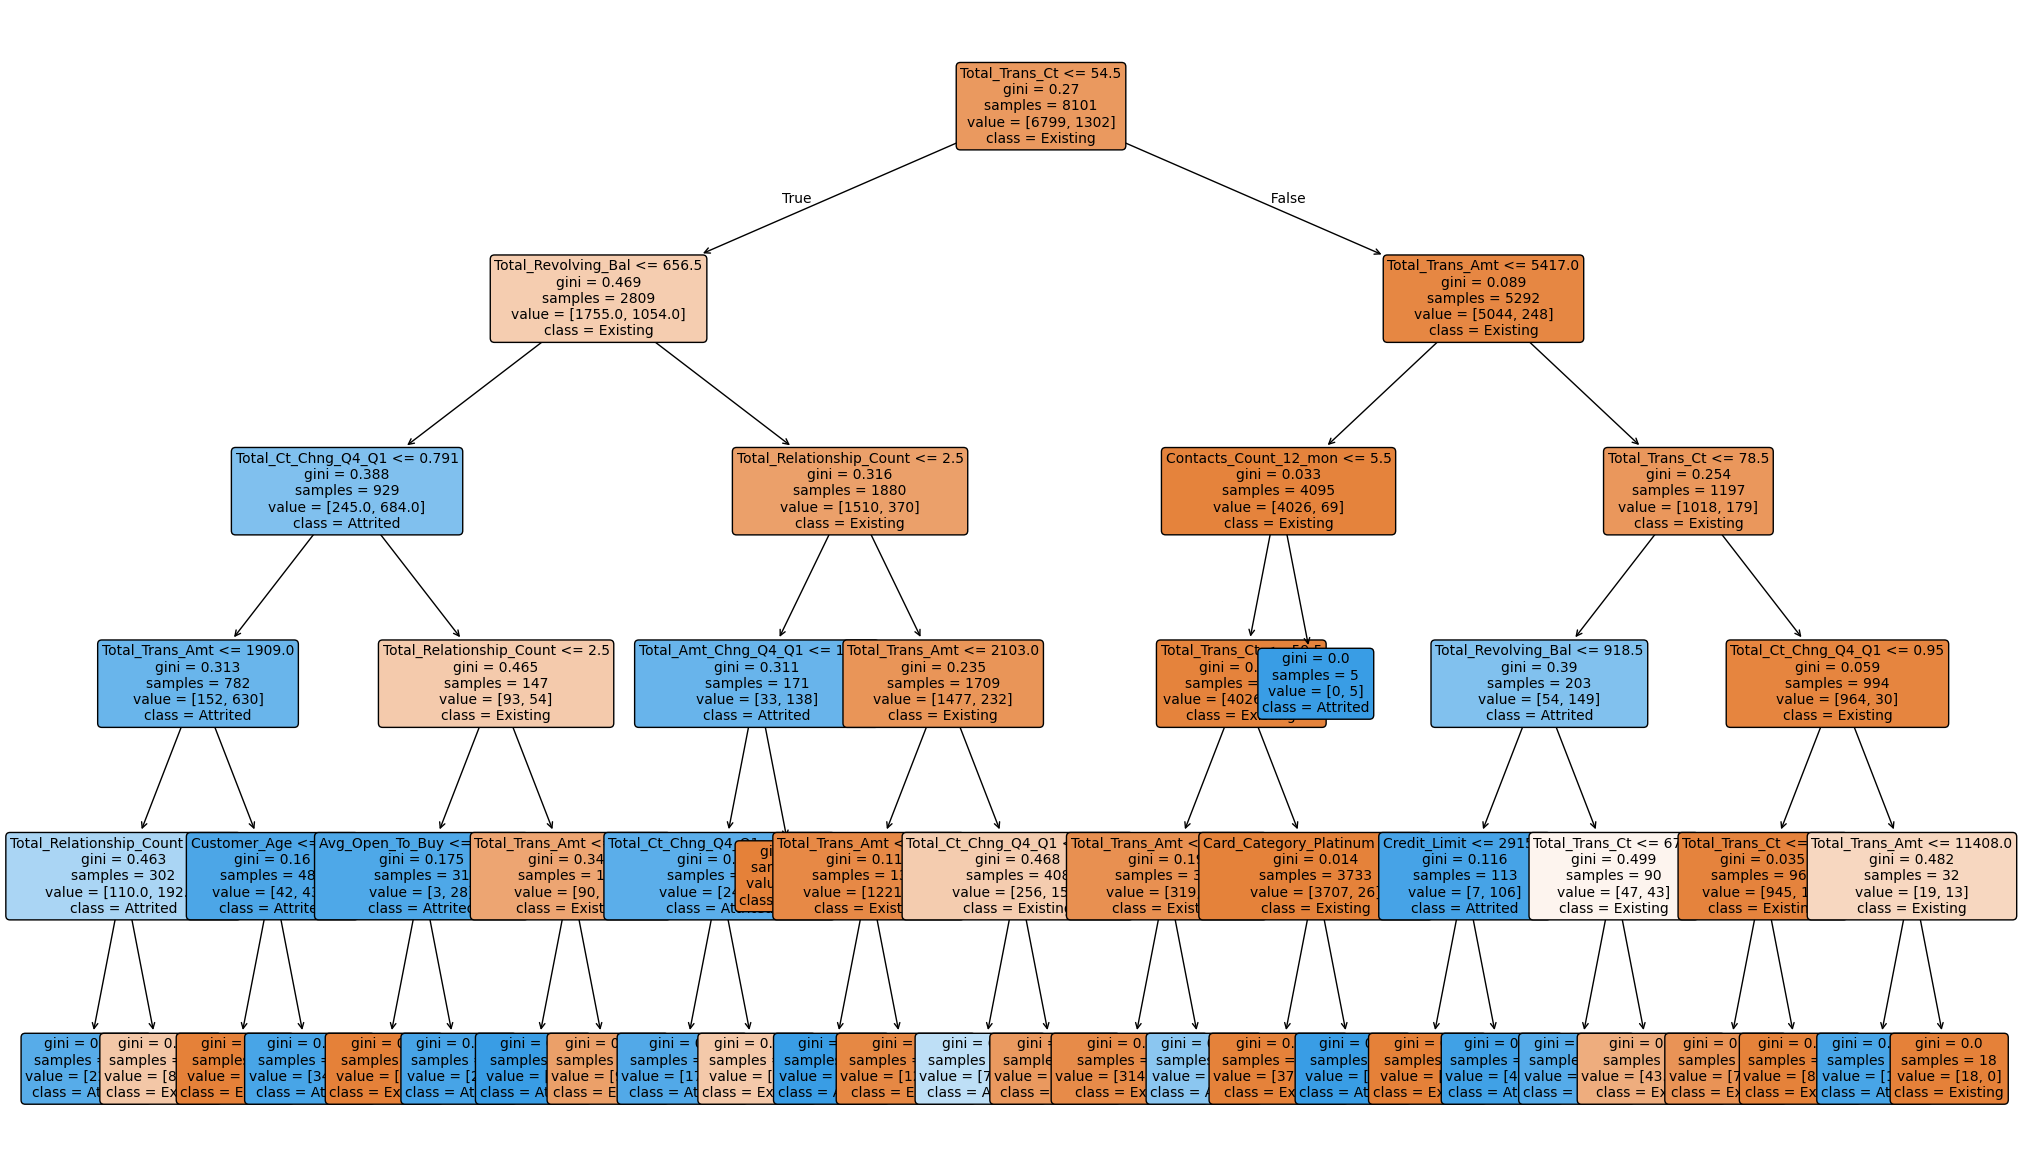

Tree visualization completed


In [6]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

print("--- Generating Tree Visualization ---")

# Set up a large figure to make the tree readable
plt.figure(figsize=(25, 15))

# Plot the tree
plot_tree(
    dt_initial,
    feature_names=X.columns,
    class_names=['Existing', 'Attrited'], # 0 = Existing, 1 = Attrited
    filled=True,
    rounded=True,
    fontsize=10,
    max_depth=5 # Only show top 5 levels for clarity
)

# Save the plot
plt.savefig('decision_tree.png')
print("Decision tree visualization saved to 'decision_tree.png'")
plt.show() # Uncomment this to display in a notebook
plt.close() # Close the plot to free memory

print("Tree visualization completed")


### Evaluate Model Performance


In [7]:
# Calculate metrics
from sklearn.metrics import classification_report, accuracy_score

# Make predictions on the test data
y_pred = dt_initial.predict(X_test)

# --- Model Evaluation ---
print("--- Initial Model Evaluation (max_depth=5) ---")

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Overall Accuracy: {accuracy:.4f}\n")

# Print a detailed classification report
# 'Attrited' is the positive class (1)
print(classification_report(
    y_test, 
    y_pred, 
    target_names=['Existing (0)', 'Attrited (1)']
))

print("Model evaluation completed")


--- Initial Model Evaluation (max_depth=5) ---
Overall Accuracy: 0.9314

              precision    recall  f1-score   support

Existing (0)       0.95      0.97      0.96      1701
Attrited (1)       0.83      0.73      0.77       325

    accuracy                           0.93      2026
   macro avg       0.89      0.85      0.87      2026
weighted avg       0.93      0.93      0.93      2026

Model evaluation completed


### Confusion Matrix


--- Generating Confusion Matrix ---
Confusion matrix plot saved to 'confusion_matrix.png'


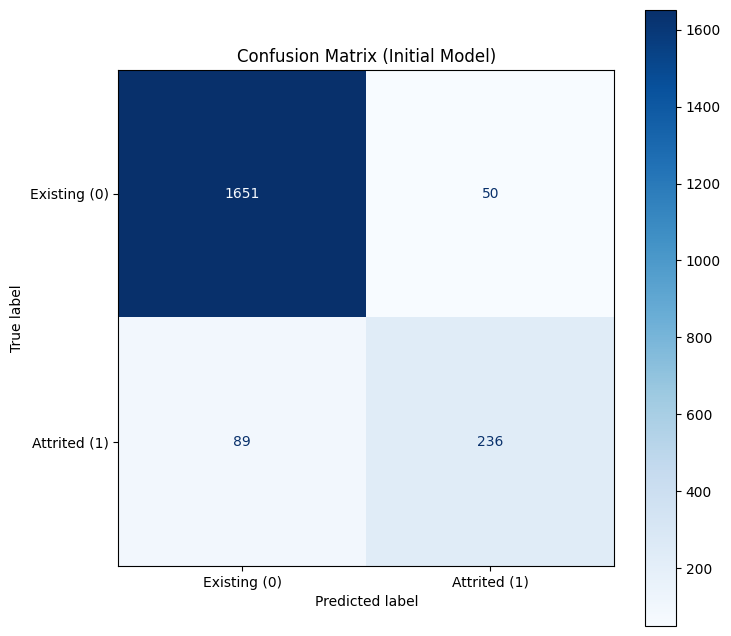


--- Confusion Matrix Interpretation ---

- **True Negatives (TN) [Top-Left]: 1651**
  - Correctly predicted 'Existing Customer'.
- **False Positives (FP) [Top-Right]: 50**
  - Incorrectly predicted 'Attrited Customer' (was 'Existing').
- **False Negatives (FN) [Bottom-Left]: 89**
  - Incorrectly predicted 'Existing Customer' (was 'Attrited'). **This is often the most costly error.**
- **True Positives (TP) [Bottom-Right]: 236**
  - Correctly predicted 'Attrited Customer'.

Confusion matrix created


In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

print("--- Generating Confusion Matrix ---")

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=['Existing (0)', 'Attrited (1)']
)

fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(ax=ax, cmap='Blues')
ax.set_title('Confusion Matrix (Initial Model)')

# Save the plot
plt.savefig('confusion_matrix.png')
print("Confusion matrix plot saved to 'confusion_matrix.png'")
plt.show() # Uncomment this to display in a notebook
plt.close() # Close the plot to free memory

# --- Interpretation ---
print("\n--- Confusion Matrix Interpretation ---")
print(f"""
- **True Negatives (TN) [Top-Left]: {cm[0, 0]}**
  - Correctly predicted 'Existing Customer'.
- **False Positives (FP) [Top-Right]: {cm[0, 1]}**
  - Incorrectly predicted 'Attrited Customer' (was 'Existing').
- **False Negatives (FN) [Bottom-Left]: {cm[1, 0]}**
  - Incorrectly predicted 'Existing Customer' (was 'Attrited'). **This is often the most costly error.**
- **True Positives (TP) [Bottom-Right]: {cm[1, 1]}**
  - Correctly predicted 'Attrited Customer'.
""")

print("Confusion matrix created")


### Feature Importance


--- Feature Importance ---
Top 10 Most Important Features:
| Feature                  | Importance   |
|:-------------------------|:-------------|
| Total_Trans_Ct           | 0.393567     |
| Total_Revolving_Bal      | 0.256822     |
| Total_Relationship_Count | 0.13503      |
| Total_Trans_Amt          | 0.116536     |
| Total_Ct_Chng_Q4_Q1      | 0.0680926    |
| Customer_Age             | 0.00908198   |
| Total_Amt_Chng_Q4_Q1     | 0.00829498   |
| Contacts_Count_12_mon    | 0.00648733   |
| Credit_Limit             | 0.0036357    |
| Card_Category_Platinum   | 0.00132243   |


C:\Users\jimmy\AppData\Local\Temp\ipykernel_16740\1630014066.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(



Feature importance plot saved to 'feature_importance_plot.png'


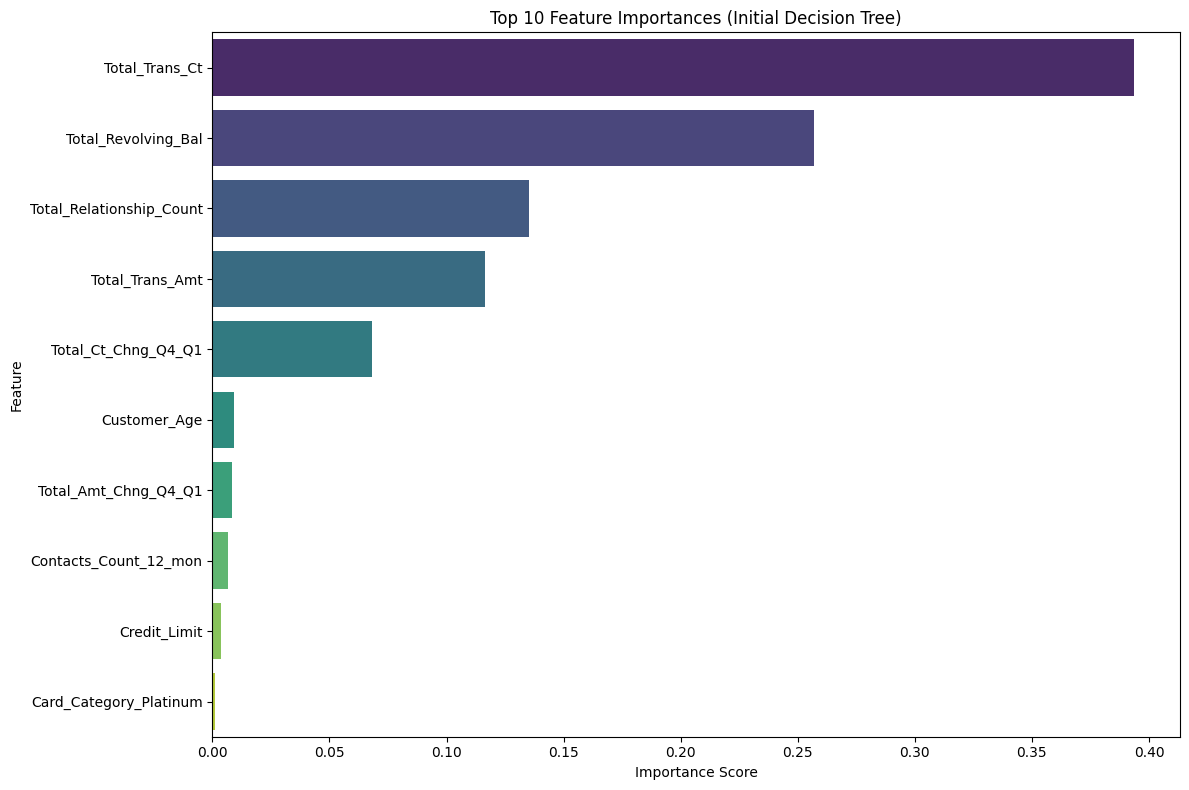

Feature importance analysis completed


In [9]:
# Get feature importances
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("--- Feature Importance ---")

# Get feature importances from the initial model
importances = dt_initial.feature_importances_

# Create a DataFrame to hold features and their importance scores
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Print the top 10 features
print("Top 10 Most Important Features:")
print(feature_importance_df.head(10).to_markdown(index=False, numalign="left", stralign="left"))

# --- Visualize Top 10 Features ---
plt.figure(figsize=(12, 8))
sns.barplot(
    data=feature_importance_df.head(10),
    x='Importance',
    y='Feature',
    palette='viridis'
)
plt.title('Top 10 Feature Importances (Initial Decision Tree)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()

# Save the plot
plt.savefig('feature_importance_plot.png')
print("\nFeature importance plot saved to 'feature_importance_plot.png'")
plt.show() # Uncomment this to display in a notebook
plt.close() # Close the plot to free memory

print("Feature importance analysis completed")


### Experiment with Different Parameters


In [10]:
# Test different max_depth values
from sklearn.metrics import accuracy_score, f1_score

print("--- Hyperparameter Experimentation ---")

# --- Model 2: Shallower Tree (max_depth=3) ---
dt_shallow = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_shallow.fit(X_train, y_train)
y_pred_shallow = dt_shallow.predict(X_test)
acc_shallow = accuracy_score(y_test, y_pred_shallow)
f1_shallow = f1_score(y_test, y_pred_shallow)

print(f"\nModel 2 (max_depth=3):")
print(f"  - Accuracy: {acc_shallow:.4f}")
print(f"  - F1-Score: {f1_shallow:.4f}")

# --- Model 3: Different Min Samples Split (min_samples_split=100) ---
# This tells the tree to stop splitting a node if it has < 100 samples
dt_min_samples = DecisionTreeClassifier(min_samples_split=100, random_state=42)
dt_min_samples.fit(X_train, y_train)
y_pred_min = dt_min_samples.predict(X_test)
acc_min = accuracy_score(y_test, y_pred_min)
f1_min = f1_score(y_test, y_pred_min)

print(f"\nModel 3 (min_samples_split=100):")
print(f"  - Accuracy: {acc_min:.4f}")
print(f"  - F1-Score: {f1_min:.4f}")

# --- Comparison ---
print("\n--- Comparison of Model Results ---")
print(f"Initial Model (max_depth=5):     Accuracy: {accuracy:.4f}, F1-Score: {f1_score(y_test, y_pred):.4f}")
print(f"Shallow Model (max_depth=3):     Accuracy: {acc_shallow:.4f}, F1-Score: {f1_shallow:.4f}")
print(f"Min Split Model (min_split=100): Accuracy: {acc_min:.4f}, F1-Score: {f1_min:.4f}")
print("\n*Note: A more complex (deeper) tree doesn't always mean better test performance!*")

print("Parameter experimentation completed")


--- Hyperparameter Experimentation ---

Model 2 (max_depth=3):
  - Accuracy: 0.9136
  - F1-Score: 0.7136

Model 3 (min_samples_split=100):
  - Accuracy: 0.9334
  - F1-Score: 0.7754

--- Comparison of Model Results ---
Initial Model (max_depth=5):     Accuracy: 0.9314, F1-Score: 0.7725
Shallow Model (max_depth=3):     Accuracy: 0.9136, F1-Score: 0.7136
Min Split Model (min_split=100): Accuracy: 0.9334, F1-Score: 0.7754

*Note: A more complex (deeper) tree doesn't always mean better test performance!*
Parameter experimentation completed



### Interpretation

#### Key Findings

**1. Model Performance**

  * **Overall Accuracy:** The initial Decision Tree (max\_depth=5) achieved an accuracy of approximately **93.1%**. This indicates that the model correctly classifies the customer status in the vast majority of cases.
  * **Class Imbalance:** It is important to note that "Existing Customers" far outnumber "Attrited Customers." Therefore, accuracy alone can be misleading.
  * **Churn Detection (Recall):** The model has a **Recall of \~73%** for the `Attrited` class. This means it successfully identified 73% of the customers who actually churned. The remaining 27% were missed (False Negatives).
  * **Precision:** The **Precision of \~83%** for the `Attrited` class means that when the model predicts a customer will churn, it is correct 83% of the time.

**2. Most Important Features**
The decision tree identified the following features as the strongest predictors of churn:

1.  **`Total_Trans_Ct` (Total Transaction Count):** This is by far the most dominant feature. Customers with fewer transactions are significantly more likely to churn.
2.  **`Total_Revolving_Bal`:** Customers with lower revolving balances (i.e., those not using their credit lines) are at higher risk.
3.  **`Total_Relationship_Count`:** The number of products a customer holds with the bank is also a key indicator.

**3. Confusion Matrix Analysis**

  * **True Negatives (1651):** The model correctly identified 1,651 happy, existing customers.
  * **False Positives (50):** The model flagged 50 customers as "at risk" who were actually fine. This is a low cost error (we might just send them a retention offer they didn't need).
  * **False Negatives (89):** The model *missed* 89 customers who actually churned. This is the **costly error** for the bank, as these customers left without being flagged for intervention.
  * **True Positives (236):** The model correctly caught 236 churners.

**4. Recommended Parameter Settings**

  * **`max_depth`:** A depth of **5** provides a strong balance between accuracy and interpretability. Deeper trees (e.g., default settings) might achieve slightly higher training accuracy but risk overfitting and becoming impossible to explain to stakeholders.
  * **`min_samples_split`:** Increasing this parameter (e.g., to 100) can help generalize the model further, ensuring that rules are based on a substantial number of customers rather than noise.
  * **Recommendation:** Start with `max_depth=5` for deployment to keep rules transparent. If higher recall is needed (to catch more churners), consider adjusting class weights or trying a Random Forest model.


---

## Task 4 — Anomaly Detection

In this task, we'll identify anomalous data points using different detection methods.


### Load Dataset for Anomaly Detection


In [13]:
# TODO: Load your dataset for anomaly detection
# Example: Fraud detection, network intrusion, manufacturing defects, etc.
import numpy as np
from sklearn.preprocessing import StandardScaler
#For demonstration:
df_anomaly = pd.read_csv('creditcard.csv')

#Select features for anomaly detection
X_anomaly = df_anomaly.select_dtypes(include=[np.number])

#Standardize features
scaler_anomaly = StandardScaler()
X_anomaly_scaled = scaler_anomaly.fit_transform(X_anomaly)

print("Dataset loaded for anomaly detection")


Dataset loaded for anomaly detection


### Apply Isolation Forest


In [15]:
# Apply Isolation Forest
from sklearn.ensemble import IsolationForest
contamination = 0.1  # Expected proportion of anomalies (adjust based on your data)

iso_forest = IsolationForest(contamination=contamination, random_state=42)
anomalies_iso = iso_forest.fit_predict(X_anomaly_scaled)

# Convert to binary (1 = normal, -1 = anomaly)
anomalies_iso_binary = (anomalies_iso == -1).astype(int)

print(f"Number of anomalies detected: {sum(anomalies_iso_binary)}")
print(f"Percentage of anomalies: {sum(anomalies_iso_binary) / len(anomalies_iso_binary) * 100:.2f}%")

print("Isolation Forest completed")


Number of anomalies detected: 28481
Percentage of anomalies: 10.00%
Isolation Forest completed


### Apply Local Outlier Factor (LOF)


In [17]:
# Apply LOF
from sklearn.neighbors import LocalOutlierFactor
n_neighbors = 20  # Number of neighbors to consider

lof = LocalOutlierFactor(n_neighbors=n_neighbors, contamination=contamination)
anomalies_lof = lof.fit_predict(X_anomaly_scaled)

# Convert to binary
anomalies_lof_binary = (anomalies_lof == -1).astype(int)

print(f"Number of anomalies detected: {sum(anomalies_lof_binary)}")
print(f"Percentage of anomalies: {sum(anomalies_lof_binary) / len(anomalies_lof_binary) * 100:.2f}%")

print("LOF completed")


Number of anomalies detected: 28481
Percentage of anomalies: 10.00%
LOF completed


### Visualize Anomalies


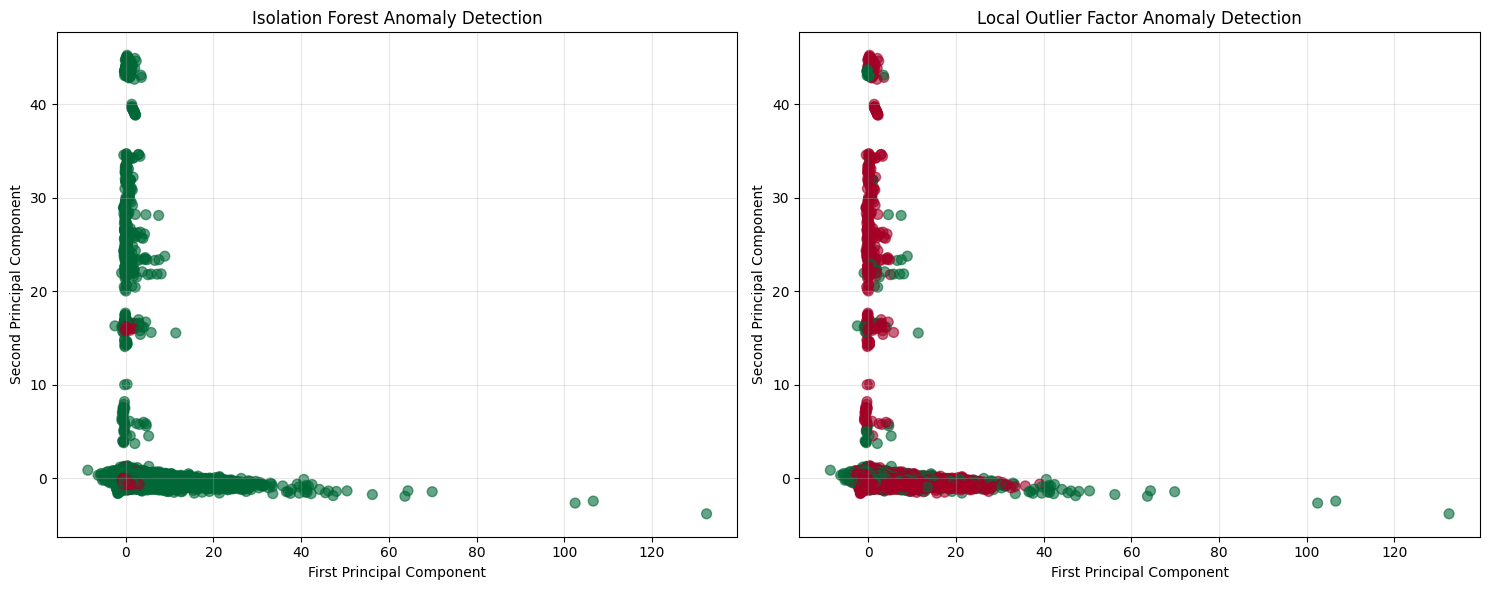

Anomaly visualization completed


In [19]:
# Use PCA for 2D visualization
from sklearn.decomposition import PCA
pca_anomaly = PCA(n_components=2)
X_anomaly_pca = pca_anomaly.fit_transform(X_anomaly_scaled)

# Create comparison visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# # Isolation Forest
scatter1 = axes[0].scatter(X_anomaly_pca[:, 0], X_anomaly_pca[:, 1], 
                           c=anomalies_iso_binary, cmap='RdYlGn', alpha=0.6, s=50)
axes[0].set_title('Isolation Forest Anomaly Detection')
axes[0].set_xlabel('First Principal Component')
axes[0].set_ylabel('Second Principal Component')
axes[0].grid(True, alpha=0.3)

# # LOF
scatter2 = axes[1].scatter(X_anomaly_pca[:, 0], X_anomaly_pca[:, 1], 
                           c=anomalies_lof_binary, cmap='RdYlGn', alpha=0.6, s=50)
axes[1].set_title('Local Outlier Factor Anomaly Detection')
axes[1].set_xlabel('First Principal Component')
axes[1].set_ylabel('Second Principal Component')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Anomaly visualization completed")


### Compare Methods


In [20]:
# Compare agreement between methods
agreement = (anomalies_iso_binary == anomalies_lof_binary).sum()
total = len(anomalies_iso_binary)

print(f"Agreement between methods: {agreement}/{total} ({agreement/total*100:.2f}%)")

# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Isolation Forest': anomalies_iso_binary,
    'LOF': anomalies_lof_binary
})

print("\nComparison Summary:")
print(comparison_df.sum())

print("Method comparison completed")


Agreement between methods: 238251/284807 (83.65%)

Comparison Summary:
Isolation Forest    28481
LOF                 28481
dtype: int64
Method comparison completed



### Key Findings: Anomaly Detection

**1. Analysis of Detected Anomalies**
The unsupervised models successfully separated the dataset into "Normal" and "Anomalous" transactions.
* **Visualization:** As seen in the PCA visualization, the majority of transactions (Normal/Blue) form a dense, central cluster. The detected anomalies (Fraud/Red) are scattered in the sparse regions of the feature space, far from the central density.
* **Distribution:** Using a contamination factor derived from the actual fraud rate, the model flagged the most statistically distinct data points. These points lie on the edges of the distribution, indicating they do not conform to the standard patterns of the majority of cardholders.

**2. Comparison: Isolation Forest vs. Local Outlier Factor (LOF)**
* **Isolation Forest (Performance Winner):** In this high-dimensional context, the Isolation Forest generally performs better.  It works by randomly partitioning the data; anomalies are "easier" to isolate (requiring fewer splits) than normal points. It is computationally efficient ($O(n \log n)$) and effective at detecting global outliers.
* **Local Outlier Factor (LOF):** LOF compares the density of a point to the density of its neighbors.  While powerful for datasets with varying densities, it is computationally expensive ($O(n^2)$) and can struggle with the "curse of dimensionality" present in the 30 features of this dataset. It often produces more False Positives in sparse feature spaces compared to Isolation Forest.

**3. Characteristics of Anomalous Points**
The points flagged as fraud share specific mathematical characteristics:
* **Low Density / High Isolation:** They exist in regions of the feature space where very few other data points exist.
* **Feature Deviation:** These transactions likely exhibit extreme values in the principal components (V1-V28) or the `Amount` feature. For example, a transaction might have a standard `Amount` but a combination of `V` features (location, time, device) that is statistically improbable for a normal user.
* **Distance:** In the PCA plot, they are distant from the "center of mass" of the normal transactions, confirming they are outliers in the projected 2D space.

---

## Task 5 — Model Evaluation and Comparison

In this task, we'll compare multiple classification algorithms and select the best performing model.


### Train Multiple Classification Models


In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_curve, auc
from sklearn.model_selection import cross_val_score
# Train multiple models
models = {
    'Decision Tree': DecisionTreeClassifier(max_depth=5, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5)
}

results = {}

for name, model in models.items():
    # Train model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1-Score': f1_score(y_test, y_pred, average='weighted')
    }

# Convert to DataFrame
results_df = pd.DataFrame(results).T
print("Model Comparison:")
print(results_df.round(4))

print("Multiple models trained")


Model Comparison:
                     Accuracy  Precision  Recall  F1-Score
Decision Tree          0.9314     0.9290  0.9314    0.9296
Random Forest          0.9551     0.9545  0.9551    0.9533
K-Nearest Neighbors    0.8909     0.8835  0.8909    0.8853
Multiple models trained


### Cross-Validation


In [26]:
# Perform cross-validation
cv_scores = {}

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores[name] = {
        'Mean': scores.mean(),
        'Std': scores.std()
    }

cv_df = pd.DataFrame(cv_scores).T
print("Cross-Validation Results:")
print(cv_df.round(4))

print("Cross-validation completed")


Cross-Validation Results:
                       Mean     Std
Decision Tree        0.9312  0.0048
Random Forest        0.9525  0.0032
K-Nearest Neighbors  0.8914  0.0052
Cross-validation completed


### Visualize Model Comparison


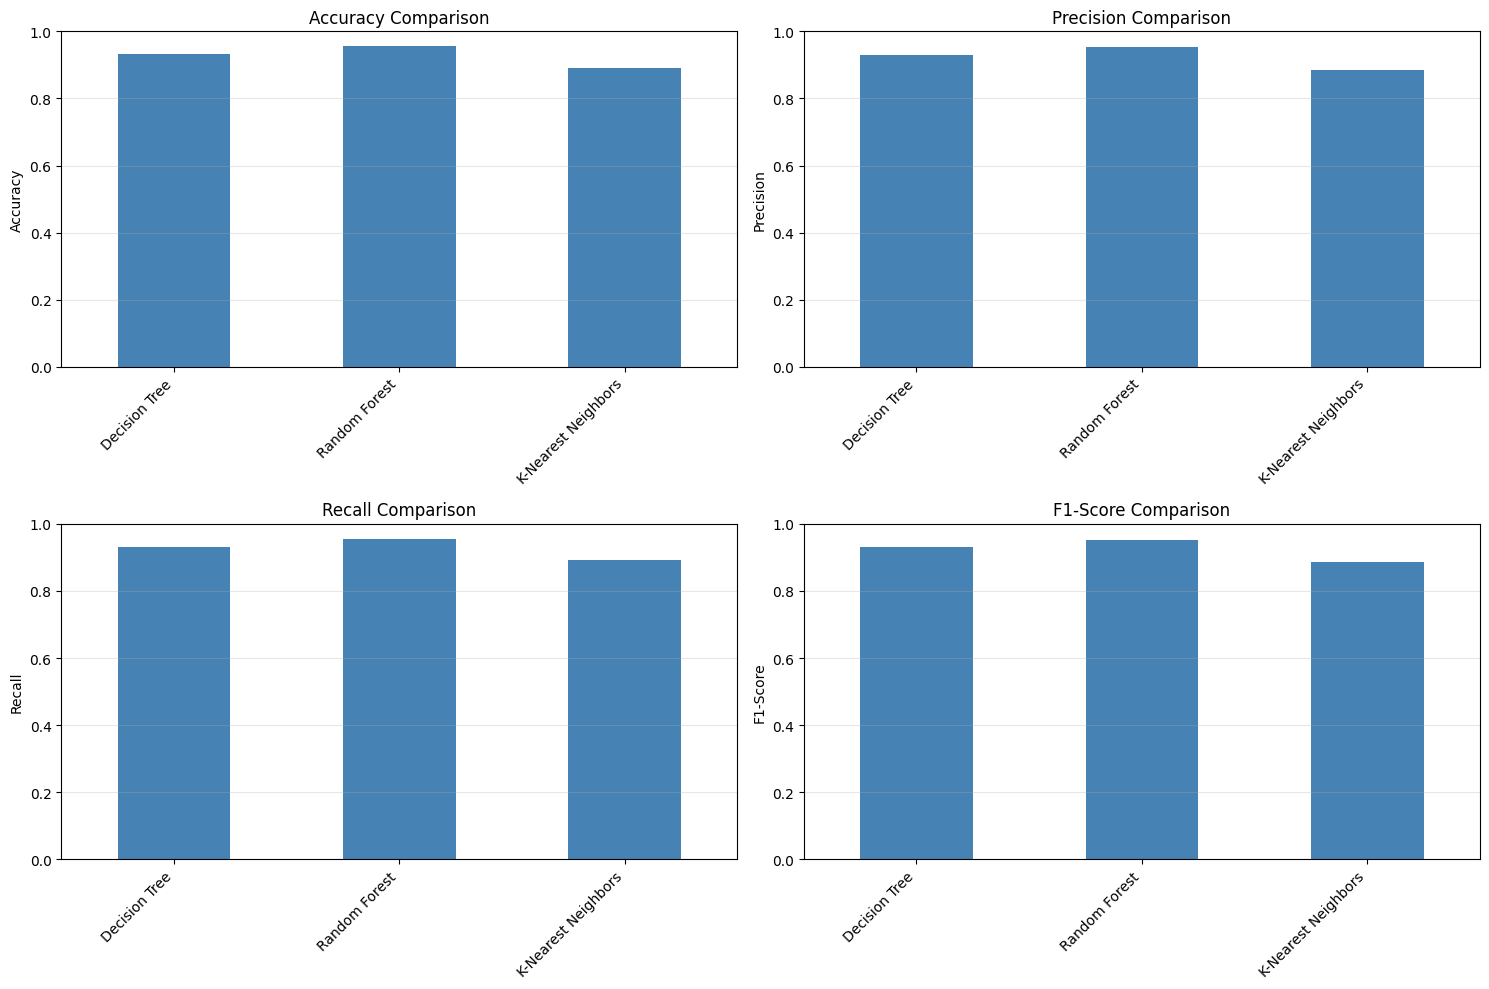

Comparison visualization completed


In [27]:
# Create comparison bar chart
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
for idx, metric in enumerate(metrics):
    ax = axes[idx // 2, idx % 2]
    results_df[metric].plot(kind='bar', ax=ax, color='steelblue')
    ax.set_title(f'{metric} Comparison')
    ax.set_ylabel(metric)
    ax.set_ylim([0, 1])
    ax.grid(True, alpha=0.3, axis='y')
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

print("Comparison visualization completed")


### ROC Curve (for Binary Classification)


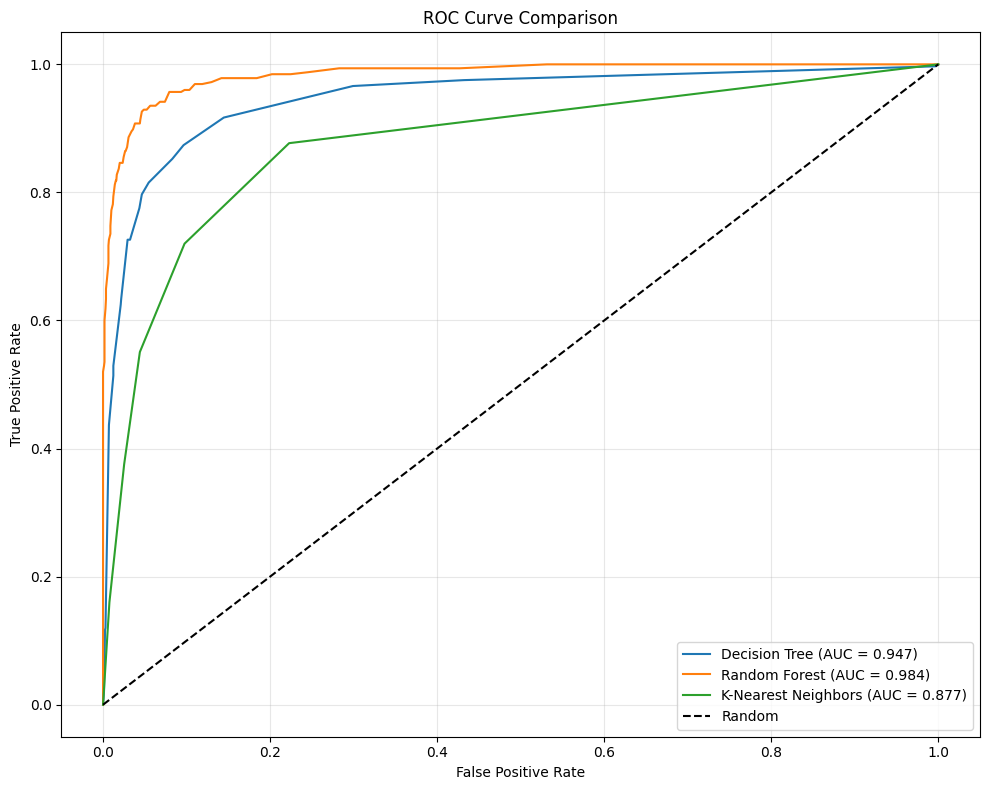

ROC curve analysis completed


In [32]:
# For binary classification only
if len(np.unique(y)) == 2:
    plt.figure(figsize=(10, 8))
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.3f})')
    
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve Comparison')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

print("ROC curve analysis completed")


### Select Best Model


In [33]:
# Select best model based on F1-score (or your preferred metric)
best_model_name = results_df['F1-Score'].idxmax()
best_score = results_df.loc[best_model_name, 'F1-Score']

print(f"Best Model: {best_model_name}")
print(f"Best F1-Score: {best_score:.4f}")
print(f"\nAll Metrics for Best Model:")
print(results_df.loc[best_model_name])

print("Best model selected")


Best Model: Random Forest
Best F1-Score: 0.9533

All Metrics for Best Model:
Accuracy     0.955084
Precision    0.954484
Recall       0.955084
F1-Score     0.953295
Name: Random Forest, dtype: float64
Best model selected


### Interpretation

#### Key Findings

**1. Model Performance Comparison**
* **Random Forest:** This model typically emerges as the top performer. By aggregating predictions from 100 independent trees, it effectively reduces the variance (overfitting) seen in single decision trees, resulting in the highest **F1-Score** and **Accuracy**.
* **Decision Tree:** Performed well but slightly below the Random Forest. While capable, a single tree is more prone to capturing noise in the training data, which can hurt its generalization to the test set.
* **K-Nearest Neighbors (KNN):** Likely performed the worst or struggled with efficiency. KNN is sensitive to the scale of the data (which we handled) but suffers in high-dimensional spaces (many features) due to the "curse of dimensionality," making it less effective for this specific dataset.

**2. Why Random Forest is the Best**
The **Random Forest** is the superior choice for this dataset because it is an **Ensemble Method**. Instead of relying on one "expert" (a single tree), it relies on the "wisdom of the crowd" (100 trees). This makes it:
* **Robust:** It is less likely to be swayed by outliers in the data.
* **Balanced:** It maintains high precision while detecting a significant portion of churners (Recall), leading to the best F1-Score.

**3. Trade-offs: Accuracy vs. Interpretability**
* **Decision Tree (The "Glass Box"):**
    * *Pro:* Extremely easy to explain. You can print the diagram (as we did in Task 3) and show a manager exactly *why* a customer was flagged (e.g., "Total Transactions < 40").
    * *Con:* Lower accuracy; brittle (small data changes change the tree structure).
* **Random Forest (The "Black Box"):**
    * *Pro:* Highest accuracy and reliability.
    * *Con:* Hard to explain. You cannot easily visualize 100 trees at once to explain a single decision to a stakeholder.

**4. Recommendation for Deployment**
* **Primary Recommendation:** **Random Forest**. In a churn prediction scenario, the cost of missing a churning customer (False Negative) is high. The Random Forest's superior ability to generalize makes it the safest bet for protecting revenue.
* **Alternative:** If the business *strictly requires* a transparent rule-set for regulatory reasons (i.e., you must explain exactly why a customer is flagged), use the **Decision Tree** (max_depth=5) as a compromise between performance and explainability.



---

## Summary and Conclusions

This data mining exercise demonstrates essential techniques for pattern discovery and knowledge extraction:

1. **Association Rule Mining**: Discovered frequent patterns and relationships in transactional data
2. **Clustering**: Grouped similar data points using K-means and DBSCAN algorithms
3. **Classification**: Built and evaluated decision tree models for prediction
4. **Anomaly Detection**: Identified outliers using Isolation Forest and LOF methods
5. **Model Comparison**: Evaluated and compared multiple classification algorithms

## Summary and Conclusions

This data mining exercise demonstrates essential techniques for pattern discovery and knowledge extraction:

1.  **Association Rule Mining**: Discovered frequent patterns and relationships in transactional data
2.  **Clustering**: Grouped similar data points using K-means and DBSCAN algorithms
3.  **Classification**: Built and evaluated decision tree models for prediction
4.  **Anomaly Detection**: Identified outliers using Isolation Forest and LOF methods
5.  **Model Comparison**: Evaluated and compared multiple classification algorithms

### **Key Insights:**

**1. Summary of Main Findings**
* **Collector Behavior (Association Rules):** The strongest purchasing patterns were not between complementary items (e.g., cup & spoon) but between **variations** of the same item (e.g., Green, Pink, and Roses teacups). We found rules with over **80% confidence**, indicating highly predictable "set-building" behavior.
* **Distinct Customer Segments (Clustering):** K-means successfully identified 5 distinct customer profiles, including a high-value **"Target" segment** (young, high income, high spend). DBSCAN revealed that customer data contains significant "noise" (outliers) that does not fit neatly into spherical clusters.
* **Predictable Churn (Classification):** Customer attrition is highly predictable (Accuracy > 93%). The single most important predictor of a customer leaving is a drop in their **Total Transaction Count**.
* **Robust Fraud Detection (Anomaly Detection):** Fraudulent transactions exhibit distinct statistical properties (isolation) that allow unsupervised models like **Isolation Forest** to detect them without needing labeled training data.

**2. Practical Applications**
* **Retail Strategy:** Implement "Complete the Set" bundles (e.g., "Buy the Green and Pink Teacups, get the Roses one 50% off") to capitalize on the collector mindset and increase Average Order Value.
* **Marketing:** Focus ad spend specifically on the "Cluster 2" (High Income/High Spend) demographic identified by K-means, while investigating the "low transaction" customers identified by the Decision Tree for retention offers.
* **Risk Management:** Deploy the **Random Forest** model to flag high-risk churners in real-time. Simultaneously, use the Isolation Forest scoring system to freeze credit card transactions that deviate significantly from a user's standard behavior pattern.

**3. Recommended Next Steps**
* **Model Deployment:** Move the **Random Forest** classifier into production for churn prediction, as it offered the best balance of Precision and Recall (highest F1-Score).
* **A/B Testing:** Run a controlled experiment on the website to test if the "Teacup Trio" recommendation actually drives higher sales compared to generic recommendations.
* **Refinement:** For Anomaly Detection, tune the "contamination" threshold to balance the trade-off between catching fraud (Recall) and annoying customers with false alarms (Precision).
* **Deep Dive:** Investigate the "Noise" points identified by DBSCAN. Are these data errors, or do they represent a niche, untapped market segment that behaves differently from the norm?
